# Data Science for League of Legends Champion Analysis

## Part 2: Machine Learning for Win Rate Prediction

## Introduction:

In Part 1 we collected all data from the website. All of attributes of all heroes are stored into a CSV file called **All Hero Data.csv**. However, we need to perform data wrangling and feature engineering before prcessing the machine learning. Appropriate machine learning models will be determined after perfecting the dataset and completing the feature engineering. 

## Objectives:

Here are all of objectives we need to complete in Part 2.

1. [Reading the CSV file from the **Data Asset**.](#1)<br>
2. [Cleaning and perfecting the data by data wrangling](#2)<br>
3. [Formulating the machine learning ready dataset by feature engineering](#3)<br>
4. [Selecting the appropriate machine learning models and fitting the dataset by them](#4)<br>
5. [Evaluating influences of all champions' attributes](#5)<br>
6. [Conclusions of this project](#6)<br>

### Reading the CSV file from the  ***Data Asset***  <a id="1"></a>

Import project token from **IBM Watson Studio** 

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='55eb1fc7-84bf-450f-ace7-ed8423edb869', project_access_token='p-cf7918da44037827f4061ca5d48b70f5e7b32452')
pc = project.project_context

Import some relevant modules

In [2]:
import matplotlib
import matplotlib.pyplot as plt

Import other relevant modules and insert the credentials for reading the data called **All Hero Data.csv**

In [3]:
import pandas as pd
import numpy as np
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_4588ee425e05441d8b88829a6fc58b19 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_4588ee425e05441d8b88829a6fc58b19 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_4588ee425e05441d8b88829a6fc58b19 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Af7Ajz-Ctkd2DyOPtgCgbBUent2y7h8ckMEEKxO7mnn9',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_4588ee425e05441d8b88829a6fc58b19)

body = client_4588ee425e05441d8b88829a6fc58b19.get_object(Bucket='leagueoflegendchampionanalysis-donotdelete-pr-w2fvnb7ixaz1tz',Key='All Hero Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Unnamed: 0,Champion Name,Champion Title,Champion ID,Attack,Defense,Magic,Difficulty,Main Tag,Alternative Tag,Pick Rate,Ban Rate,Average Damage,Average KDA,Average Gold,Overall Win Rate
0,0,Annie,the Dark Child,1,2,3,10,6,Mage,Mage,0.784328,4.621103,18.585733,2.188159,12735.955851,56.925532
1,1,Olaf,the Berserker,2,9,5,3,3,Fighter,Tank,0.247063,0.991058,15.686542,1.767575,11758.796353,52.077001
2,2,Galio,the Colossus,3,1,10,6,5,Tank,Mage,0.688457,1.700183,17.162824,2.533220,11997.224215,49.400073
3,3,Twisted Fate,the Card Master,4,6,2,6,9,Mage,Mage,0.596340,0.450943,15.788534,1.696158,12224.242759,38.743529
4,4,Xin Zhao,the Seneschal of Demacia,5,8,6,3,2,Fighter,Assassin,0.472015,1.424416,15.262610,2.095634,11859.595899,62.877850


Create a copy of the DataFrame. Since the column called **Unnamed: 0** is not neccessary, it is dropped. 

In [4]:
df = df_data_1.copy()
df.drop(columns=["Unnamed: 0"],inplace=True)
df

,Champion Name,Champion Title,Champion ID,Attack,Defense,Magic,Difficulty,Main Tag,Alternative Tag,Pick Rate,Ban Rate,Average Damage,Average KDA,Average Gold,Overall Win Rate
0,Annie,the Dark Child,1,2,3,10,6,Mage,Mage,0.784328,4.621103,18.585733,2.188159,12735.955851,56.925532
1,Olaf,the Berserker,2,9,5,3,3,Fighter,Tank,0.247063,0.991058,15.686542,1.767575,11758.796353,52.077001
2,Galio,the Colossus,3,1,10,6,5,Tank,Mage,0.688457,1.700183,17.162824,2.533220,11997.224215,49.400073
3,Twisted Fate,the Card Master,4,6,2,6,9,Mage,Mage,0.596340,0.450943,15.788534,1.696158,12224.242759,38.743529
4,Xin Zhao,the Seneschal of Demacia,5,8,6,3,2,Fighter,Assassin,0.472015,1.424416,15.262610,2.095634,11859.595899,62.877850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Pyke,the Bloodharbor Ripper,555,9,3,1,7,Support,Assassin,3.366520,9.655563,15.110331,2.727830,15135.653308,37.871465
152,Yone,the Unforgotten,777,8,4,4,8,Assassin,Fighter,3.717215,19.067696,14.822916,1.586173,11780.560920,59.687991
153,Sett,the Boss,875,8,5,1,2,Fighter,Tank,3.625682,13.314527,16.638768,2.115679,12122.544197,64.230318
154,Lillia,the Bashful Bloom,876,0,2,10,8,Fighter,Mage,1.519010,2.933004,17.563882,2.502083,12622.051909,66.058775


Check the data type of each column.

In [5]:
df.dtypes

Champion Name        object
Champion Title       object
Champion ID           int64
Attack                int64
Defense               int64
Magic                 int64
Difficulty            int64
Main Tag             object
Alternative Tag      object
Pick Rate           float64
Ban Rate            float64
Average Damage      float64
Average KDA         float64
Average Gold        float64
Overall Win Rate    float64
dtype: object

Check if columns have empty (**i.e. na**) values. We find that all columns after **Pick Rate** have 2 empty values. After checking the corresponding CSV file in Excel, those empty values are relating to chmpions called **Teemo** and **Karthus**, who occupy the indexes of 16 and 29 respectively.

### Cleaning and perfecting the data by data wrangling  <a id="2"></a>

In [6]:
df.isna().value_counts()

Champion Name  Champion Title  Champion ID  Attack  Defense  Magic  Difficulty  Main Tag  Alternative Tag  Pick Rate  Ban Rate  Average Damage  Average KDA  Average Gold  Overall Win Rate
False          False           False        False   False    False  False       False     False            False      False     False           False        False         False               154
                                                                                                           True       True      True            True         True          True                  2
dtype: int64

The data for **Teemo** after the column **Pick Rate** are replaced by the average of the first half part of the corresponding data, while these data for **Karthus** are replaced by the second half.

In [7]:
half_length = int(df.shape[0]/2) # Find the legnth of half of the dataset and convert it into ineger.
for i in range(9,(df.shape[1])):
    df.iloc[16,i]=df.iloc[0:half_length+1,i].mean() # Add the average of the upper half part of data for Teemo
    df.iloc[29,i]=df.iloc[half_length:df.shape[0],i].mean() # Add the average of the lower half part of data for Karthus
df

,Champion Name,Champion Title,Champion ID,Attack,Defense,Magic,Difficulty,Main Tag,Alternative Tag,Pick Rate,Ban Rate,Average Damage,Average KDA,Average Gold,Overall Win Rate
0,Annie,the Dark Child,1,2,3,10,6,Mage,Mage,0.784328,4.621103,18.585733,2.188159,12735.955851,56.925532
1,Olaf,the Berserker,2,9,5,3,3,Fighter,Tank,0.247063,0.991058,15.686542,1.767575,11758.796353,52.077001
2,Galio,the Colossus,3,1,10,6,5,Tank,Mage,0.688457,1.700183,17.162824,2.533220,11997.224215,49.400073
3,Twisted Fate,the Card Master,4,6,2,6,9,Mage,Mage,0.596340,0.450943,15.788534,1.696158,12224.242759,38.743529
4,Xin Zhao,the Seneschal of Demacia,5,8,6,3,2,Fighter,Assassin,0.472015,1.424416,15.262610,2.095634,11859.595899,62.877850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Pyke,the Bloodharbor Ripper,555,9,3,1,7,Support,Assassin,3.366520,9.655563,15.110331,2.727830,15135.653308,37.871465
152,Yone,the Unforgotten,777,8,4,4,8,Assassin,Fighter,3.717215,19.067696,14.822916,1.586173,11780.560920,59.687991
153,Sett,the Boss,875,8,5,1,2,Fighter,Tank,3.625682,13.314527,16.638768,2.115679,12122.544197,64.230318
154,Lillia,the Bashful Bloom,876,0,2,10,8,Fighter,Mage,1.519010,2.933004,17.563882,2.502083,12622.051909,66.058775


Check the count of **Main Tag** and **Alternative Tag**

In [8]:
df["Main Tag"].value_counts()

Fighter     43
Mage        34
Marksman    26
Tank        20
Assassin    18
Support     15
Name: Main Tag, dtype: int64

In [9]:
df["Alternative Tag"].value_counts()

Mage        39
Fighter     28
Assassin    27
Tank        26
Support     19
Marksman    17
Name: Alternative Tag, dtype: int64

### Formulating the machine learning ready dataset by feature engineering  <a id="3"></a>

There are 6 different tags of all characters in total. All of tags will be added as new columns.

In [10]:
df[['Mage','Fighter','Assassin','Tank','Support','Marksman']]=np.nan # Create empty columns
df.replace(np.nan,0,inplace=True) # Replace empty columns with lists of 0s
df

,Champion Name,Champion Title,Champion ID,Attack,Defense,Magic,Difficulty,Main Tag,Alternative Tag,Pick Rate,...,Average Damage,Average KDA,Average Gold,Overall Win Rate,Mage,Fighter,Assassin,Tank,Support,Marksman
0,Annie,the Dark Child,1,2,3,10,6,Mage,Mage,0.784328,...,18.585733,2.188159,12735.955851,56.925532,0.0,0.0,0.0,0.0,0.0,0.0
1,Olaf,the Berserker,2,9,5,3,3,Fighter,Tank,0.247063,...,15.686542,1.767575,11758.796353,52.077001,0.0,0.0,0.0,0.0,0.0,0.0
2,Galio,the Colossus,3,1,10,6,5,Tank,Mage,0.688457,...,17.162824,2.533220,11997.224215,49.400073,0.0,0.0,0.0,0.0,0.0,0.0
3,Twisted Fate,the Card Master,4,6,2,6,9,Mage,Mage,0.596340,...,15.788534,1.696158,12224.242759,38.743529,0.0,0.0,0.0,0.0,0.0,0.0
4,Xin Zhao,the Seneschal of Demacia,5,8,6,3,2,Fighter,Assassin,0.472015,...,15.262610,2.095634,11859.595899,62.877850,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Pyke,the Bloodharbor Ripper,555,9,3,1,7,Support,Assassin,3.366520,...,15.110331,2.727830,15135.653308,37.871465,0.0,0.0,0.0,0.0,0.0,0.0
152,Yone,the Unforgotten,777,8,4,4,8,Assassin,Fighter,3.717215,...,14.822916,1.586173,11780.560920,59.687991,0.0,0.0,0.0,0.0,0.0,0.0
153,Sett,the Boss,875,8,5,1,2,Fighter,Tank,3.625682,...,16.638768,2.115679,12122.544197,64.230318,0.0,0.0,0.0,0.0,0.0,0.0
154,Lillia,the Bashful Bloom,876,0,2,10,8,Fighter,Mage,1.519010,...,17.563882,2.502083,12622.051909,66.058775,0.0,0.0,0.0,0.0,0.0,0.0


Check if there are still empty (**i.e. na**) values

In [11]:
df.isna().value_counts()

Champion Name  Champion Title  Champion ID  Attack  Defense  Magic  Difficulty  Main Tag  Alternative Tag  Pick Rate  Ban Rate  Average Damage  Average KDA  Average Gold  Overall Win Rate  Mage   Fighter  Assassin  Tank   Support  Marksman
False          False           False        False   False    False  False       False     False            False      False     False           False        False         False             False  False    False     False  False    False       156
dtype: int64

Rearrange the DataFrame

In [12]:
df=df[["Champion Name","Champion Title","Champion ID","Attack","Defense","Magic","Difficulty","Main Tag","Alternative Tag","Fighter",
                        "Mage","Assassin","Tank","Support","Marksman","Pick Rate","Ban Rate","Average Damage","Average KDA","Average Gold","Overall Win Rate"]]
df

,Champion Name,Champion Title,Champion ID,Attack,Defense,Magic,Difficulty,Main Tag,Alternative Tag,Fighter,...,Assassin,Tank,Support,Marksman,Pick Rate,Ban Rate,Average Damage,Average KDA,Average Gold,Overall Win Rate
0,Annie,the Dark Child,1,2,3,10,6,Mage,Mage,0.0,...,0.0,0.0,0.0,0.0,0.784328,4.621103,18.585733,2.188159,12735.955851,56.925532
1,Olaf,the Berserker,2,9,5,3,3,Fighter,Tank,0.0,...,0.0,0.0,0.0,0.0,0.247063,0.991058,15.686542,1.767575,11758.796353,52.077001
2,Galio,the Colossus,3,1,10,6,5,Tank,Mage,0.0,...,0.0,0.0,0.0,0.0,0.688457,1.700183,17.162824,2.533220,11997.224215,49.400073
3,Twisted Fate,the Card Master,4,6,2,6,9,Mage,Mage,0.0,...,0.0,0.0,0.0,0.0,0.596340,0.450943,15.788534,1.696158,12224.242759,38.743529
4,Xin Zhao,the Seneschal of Demacia,5,8,6,3,2,Fighter,Assassin,0.0,...,0.0,0.0,0.0,0.0,0.472015,1.424416,15.262610,2.095634,11859.595899,62.877850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Pyke,the Bloodharbor Ripper,555,9,3,1,7,Support,Assassin,0.0,...,0.0,0.0,0.0,0.0,3.366520,9.655563,15.110331,2.727830,15135.653308,37.871465
152,Yone,the Unforgotten,777,8,4,4,8,Assassin,Fighter,0.0,...,0.0,0.0,0.0,0.0,3.717215,19.067696,14.822916,1.586173,11780.560920,59.687991
153,Sett,the Boss,875,8,5,1,2,Fighter,Tank,0.0,...,0.0,0.0,0.0,0.0,3.625682,13.314527,16.638768,2.115679,12122.544197,64.230318
154,Lillia,the Bashful Bloom,876,0,2,10,8,Fighter,Mage,0.0,...,0.0,0.0,0.0,0.0,1.519010,2.933004,17.563882,2.502083,12622.051909,66.058775


Originally, it is supposed to use the **pandas.get_dummies** function to convert tags into numerical values with 0 and 1. In this case, however, since the columns **Main Tag** and **Alternative Tag** describe virtually the same thing, which are the tags of characters. Thus, we use the following algorithm to deal with it. 
* If column **Main Tag** is X, then the column X will be added by 1
* Same for column **Alternative Tag**
* Thus, The 6 columns for tags can have values of 0, 1, or 2

In [13]:
for i in range (0,len(df)):
    for j in range(7,9):
        if df.iloc[i,j]=="Fighter":
            df["Fighter"][i]+=1
        elif df.iloc[i,j]=="Mage":
            df["Mage"][i]+=1
        elif df.iloc[i,j]=="Assassin":
            df["Assassin"][i]+=1
        elif df.iloc[i,j]=="Tank":
            df["Tank"][i]+=1
        elif df.iloc[i,j]=="Support":
            df["Support"][i]+=1
        elif df.iloc[i,j]=="Marksman":
            df["Marksman"][i]+=1
        else:
            pass
df

<ipython-input-13-f44ce25703b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mage"][i]+=1
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-13-f44ce25703b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fighter"][i]+=1
<ipython-input-13-f44ce25703b5>:10: SettingWi

,Champion Name,Champion Title,Champion ID,Attack,Defense,Magic,Difficulty,Main Tag,Alternative Tag,Fighter,...,Assassin,Tank,Support,Marksman,Pick Rate,Ban Rate,Average Damage,Average KDA,Average Gold,Overall Win Rate
0,Annie,the Dark Child,1,2,3,10,6,Mage,Mage,0.0,...,0.0,0.0,0.0,0.0,0.784328,4.621103,18.585733,2.188159,12735.955851,56.925532
1,Olaf,the Berserker,2,9,5,3,3,Fighter,Tank,1.0,...,0.0,1.0,0.0,0.0,0.247063,0.991058,15.686542,1.767575,11758.796353,52.077001
2,Galio,the Colossus,3,1,10,6,5,Tank,Mage,0.0,...,0.0,1.0,0.0,0.0,0.688457,1.700183,17.162824,2.533220,11997.224215,49.400073
3,Twisted Fate,the Card Master,4,6,2,6,9,Mage,Mage,0.0,...,0.0,0.0,0.0,0.0,0.596340,0.450943,15.788534,1.696158,12224.242759,38.743529
4,Xin Zhao,the Seneschal of Demacia,5,8,6,3,2,Fighter,Assassin,1.0,...,1.0,0.0,0.0,0.0,0.472015,1.424416,15.262610,2.095634,11859.595899,62.877850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Pyke,the Bloodharbor Ripper,555,9,3,1,7,Support,Assassin,0.0,...,1.0,0.0,1.0,0.0,3.366520,9.655563,15.110331,2.727830,15135.653308,37.871465
152,Yone,the Unforgotten,777,8,4,4,8,Assassin,Fighter,1.0,...,1.0,0.0,0.0,0.0,3.717215,19.067696,14.822916,1.586173,11780.560920,59.687991
153,Sett,the Boss,875,8,5,1,2,Fighter,Tank,1.0,...,0.0,1.0,0.0,0.0,3.625682,13.314527,16.638768,2.115679,12122.544197,64.230318
154,Lillia,the Bashful Bloom,876,0,2,10,8,Fighter,Mage,1.0,...,0.0,0.0,0.0,0.0,1.519010,2.933004,17.563882,2.502083,12622.051909,66.058775


In [14]:
project.save_data(data=df.to_csv(index=True),file_name='Intermediate Featured Hero Data.csv',overwrite=True)

{'file_name': 'Intermediate Featured Hero Data.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'lolbackup-donotdelete-pr-taxcphl3f5hkzi',
 'asset_id': '31be2b9e-d98b-42b9-be1e-d198fadf0d71'}

* The attributes called **Champion Name**, **Champion Title**, and **Champion ID** do not affect the win rate. Also, the columns named **Main Tag** and **Alternative Tag** are quantified by the above algorithm. 
* Hence, these columns should be dropped and a new DataFrame that is machine learning ready is created and named as **machine_learning_df**.

In [15]:
machine_learning_df=df.drop(columns=["Champion Name","Champion Title","Champion ID","Main Tag","Alternative Tag"])
machine_learning_df

,Attack,Defense,Magic,Difficulty,Fighter,Mage,Assassin,Tank,Support,Marksman,Pick Rate,Ban Rate,Average Damage,Average KDA,Average Gold,Overall Win Rate
0,2,3,10,6,0.0,2.0,0.0,0.0,0.0,0.0,0.784328,4.621103,18.585733,2.188159,12735.955851,56.925532
1,9,5,3,3,1.0,0.0,0.0,1.0,0.0,0.0,0.247063,0.991058,15.686542,1.767575,11758.796353,52.077001
2,1,10,6,5,0.0,1.0,0.0,1.0,0.0,0.0,0.688457,1.700183,17.162824,2.533220,11997.224215,49.400073
3,6,2,6,9,0.0,2.0,0.0,0.0,0.0,0.0,0.596340,0.450943,15.788534,1.696158,12224.242759,38.743529
4,8,6,3,2,1.0,0.0,1.0,0.0,0.0,0.0,0.472015,1.424416,15.262610,2.095634,11859.595899,62.877850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,9,3,1,7,0.0,0.0,1.0,0.0,1.0,0.0,3.366520,9.655563,15.110331,2.727830,15135.653308,37.871465
152,8,4,4,8,1.0,0.0,1.0,0.0,0.0,0.0,3.717215,19.067696,14.822916,1.586173,11780.560920,59.687991
153,8,5,1,2,1.0,0.0,0.0,1.0,0.0,0.0,3.625682,13.314527,16.638768,2.115679,12122.544197,64.230318
154,0,2,10,8,1.0,1.0,0.0,0.0,0.0,0.0,1.519010,2.933004,17.563882,2.502083,12622.051909,66.058775


In [16]:
machine_learning_df.describe()

,Attack,Defense,Magic,Difficulty,Fighter,Mage,Assassin,Tank,Support,Marksman,Pick Rate,Ban Rate,Average Damage,Average KDA,Average Gold,Overall Win Rate
count,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.391026,4.576923,5.25000,5.653846,0.455128,0.467949,0.288462,0.294872,0.217949,0.275641,1.298654,5.761918,16.146666,2.123568,12098.410103,48.322805
std,2.856964,2.143372,2.81843,2.204552,0.536932,0.646777,0.520665,0.484840,0.429476,0.617735,1.121478,8.730679,1.780468,0.389529,752.221511,9.921846
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128914,0.200762,11.596223,1.276797,10123.663651,30.661041
25%,3.000000,3.000000,3.00000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524707,1.120482,14.988815,1.830425,11605.194468,39.733230
50%,6.000000,4.500000,5.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980869,2.409807,16.158615,2.081696,12075.036938,48.734732
75%,8.000000,6.000000,8.00000,7.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.521638,5.710900,17.393965,2.370433,12588.063497,55.814998
max,10.000000,10.000000,10.00000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.767816,51.322327,21.691719,3.906296,15135.653308,70.108448


* All columns except **Overall Win Rate** are considered as feature.
* The column **Win Rate** is the target.

In [17]:
feature=machine_learning_df.iloc[:,:-1]
feature

,Attack,Defense,Magic,Difficulty,Fighter,Mage,Assassin,Tank,Support,Marksman,Pick Rate,Ban Rate,Average Damage,Average KDA,Average Gold
0,2,3,10,6,0.0,2.0,0.0,0.0,0.0,0.0,0.784328,4.621103,18.585733,2.188159,12735.955851
1,9,5,3,3,1.0,0.0,0.0,1.0,0.0,0.0,0.247063,0.991058,15.686542,1.767575,11758.796353
2,1,10,6,5,0.0,1.0,0.0,1.0,0.0,0.0,0.688457,1.700183,17.162824,2.533220,11997.224215
3,6,2,6,9,0.0,2.0,0.0,0.0,0.0,0.0,0.596340,0.450943,15.788534,1.696158,12224.242759
4,8,6,3,2,1.0,0.0,1.0,0.0,0.0,0.0,0.472015,1.424416,15.262610,2.095634,11859.595899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,9,3,1,7,0.0,0.0,1.0,0.0,1.0,0.0,3.366520,9.655563,15.110331,2.727830,15135.653308
152,8,4,4,8,1.0,0.0,1.0,0.0,0.0,0.0,3.717215,19.067696,14.822916,1.586173,11780.560920
153,8,5,1,2,1.0,0.0,0.0,1.0,0.0,0.0,3.625682,13.314527,16.638768,2.115679,12122.544197
154,0,2,10,8,1.0,1.0,0.0,0.0,0.0,0.0,1.519010,2.933004,17.563882,2.502083,12622.051909


In [18]:
target=machine_learning_df[["Overall Win Rate"]]
target

,Overall Win Rate
0,56.925532
1,52.077001
2,49.400073
3,38.743529
4,62.877850
...,...
151,37.871465
152,59.687991
153,64.230318
154,66.058775


### Selecting the appropriate machine learning models and fitting the dataset by them  <a id="4"></a>

#### Import all of machine learning models

In [19]:
from sklearn import linear_model, model_selection, preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

#### Let's build the model without ***StandardScalar*** and ***Lasso*** first

Try linear regression first

In [20]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2) # Perform train and test split with testing portion of 20%
LR = LinearRegression()
LR = LR.fit(x_train, y_train) # Fit the training set 
y_train_pred = LR.predict(x_train) # Predict the outcome of the training set
y_test_pred = LR.predict(x_test) # Predict the outcome of the testing set

Get the coefficients and intercept

In [21]:
lr_coef_without_scalar = LR.coef_[0] 
lr_coef_without_scalar

array([ 8.38417226e-01, -7.05617176e-01,  3.74573524e-01, -1.38851937e+00,
        1.28908313e+00, -8.56497716e-01,  1.11118438e+00,  1.71805629e+00,
       -4.70316277e+00,  1.44133668e+00,  2.74369005e+00, -3.83678259e-01,
        2.51504617e-01,  4.05284031e+00,  2.55193714e-03])

In [22]:
lr_intercept_without_scalar = LR.intercept_[0]
lr_intercept_without_scalar

7.932931186359106

In [23]:
print("R2 for training set for Linear Regression without StandardScalar is {}".format(r2_score(y_train,y_train_pred)))
print("R2 for testing set for Linear Regression without StandardScalar is {}".format(r2_score(y_test,y_test_pred)))

R2 for training set for Linear Regression without StandardScalar is 0.43548828198346945
R2 for testing set for Linear Regression without StandardScalar is 0.09627135361810146


For linear regression model without **StandardScalar**, the **R2 score** is not quite high but still positive, for both training and testing set. This means that linear model is acceptable but not a very good choice.

Let's try polynomial regressions with degrees from 2 to 8.

In [24]:
r2_table_for_poly_without_standardscalar = pd.DataFrame(columns=["Degrees of Polynomial","R2 for Training","R2 for Testing"])
for i in range (2,9,1):
    poly = PolynomialFeatures(degree = i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    poly_model=LinearRegression()
    poly_model=poly_model.fit(x_train_poly,y_train)
    y_train_poly=poly_model.predict(x_train_poly)
    y_test_poly=poly_model.predict(x_test_poly)
    degree = i
    r2_training_score = r2_score(y_train,y_train_poly)
    r2_testing_score = r2_score(y_test,y_test_poly)
    r2_table_for_poly_without_standardscalar=r2_table_for_poly_without_standardscalar.append({"Degrees of Polynomial":degree,
                                                                                              'R2 for Training':r2_training_score,"R2 for Testing":r2_testing_score},ignore_index=True)
    
r2_table_for_poly_without_standardscalar

,Degrees of Polynomial,R2 for Training,R2 for Testing
0,2.0,0.985097,-66.127748
1,3.0,1.000000,-85.133526
2,4.0,1.000000,-78.605025
3,5.0,1.000000,-71.602976
4,6.0,1.000000,-64.283462
5,7.0,1.000000,-56.768365
6,8.0,1.000000,-49.153500


For all degrees between 2 and 8, the **R2 score** for the training sets is very close to 1, but these score for the testing sets are negative. It indicates that the polynomial regression is overfitting the dataset.

#### Let's try ***StandardScalar*** but not ***Lasso*** now

In [25]:
s = StandardScaler()
fitted_feature = s.fit_transform(feature)
x_train,x_test,y_train,y_test = train_test_split(fitted_feature,target,test_size=0.2)
LR2 = LinearRegression()
LR2 = LR2.fit(x_train, y_train)
y_train_pred = LR2.predict(x_train)
y_test_pred = LR2.predict(x_test)

In [26]:
fitted_feature

array([[-1.19075607, -0.73809005,  1.6907632 , ...,  1.37431429,
         0.16635264,  0.85028018],
       [ 1.26728859,  0.19802416, -0.80088783, ..., -0.25926135,
        -0.91684917, -0.45293509],
       [-1.5419053 ,  2.53830969,  0.26696261, ...,  0.57256305,
         1.05504518, -0.1349493 ],
       ...,
       [ 0.91613936,  0.19802416, -1.51278813, ...,  0.27727907,
        -0.02031917,  0.03218709],
       [-1.89305454, -1.20614716,  1.6907632 , ...,  0.79854296,
         0.97485494,  0.6983691 ],
       [ 0.56499012, -0.27003295, -0.08898754, ..., -1.64061094,
        -1.20906844, -1.46446352]])

In [27]:
lr_coef_with_scalar = LR2.coef_[0]
lr_coef_with_scalar

array([ 3.39283757, -1.8373447 ,  1.44112139, -2.1965705 ,  1.80777778,
       -0.71263858, -0.28668028,  0.73807939, -2.48324721,  0.56363028,
        3.48498749, -2.82664789,  0.02947716,  1.12072377,  1.80575284])

In [28]:
lr_intercept_with_scalar = LR2.intercept_[0]
lr_intercept_with_scalar

48.449721986807866

In [29]:
print("R2 for training set for Linear Regression with StandardScalar is {}".format(r2_score(y_train,y_train_pred)))
print("R2 for testing set for Linear Regression with StandardScalar is {}".format(r2_score(y_test,y_test_pred)))

R2 for training set for Linear Regression with StandardScalar is 0.4669388843824498
R2 for testing set for Linear Regression with StandardScalar is 0.06900219433681665


#### Finally, let's try ***StandardScalar*** together with ***Lasso***

Try to fit quadratic model without train test split

In [30]:
poly = PolynomialFeatures(degree = 2,include_bias=False,)
x_pf = poly.fit_transform(feature)
x_pf_ss = s.fit_transform(x_pf)
las = Lasso()
las.fit(x_pf_ss, target)
las.coef_ 

array([ 0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.82502177,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  2.43345459,  0.        ,
       -0.        , -0.        , -0.51461737, -0.        , -0.71095015,
        0.        ,  0.        , -0.39545442,  0.02867652,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.77936292,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.  

In [31]:
print("R2 score for polynomial regression of degree of 2 with StandardScalar and Lasso but without spliting is {}".format(r2_score(target,las.predict(x_pf_ss))))

R2 score for polynomial regression of degree of 2 with StandardScalar and Lasso but without spliting is 0.3899068398664639


Now try to fit quadratic model with train test split

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,target,test_size=0.2)
x_pf_train = poly.fit_transform(X_train)
x_pf_ss_train = s.fit_transform(x_pf_train)
x_pf_test = poly.fit_transform(X_test)
x_pf_ss_test = s.fit_transform(x_pf_test)
las = Lasso()
las.fit(x_pf_ss_train, Y_train)
las.coef_ 

array([ 0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  1.93075704,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  1.93644401,  0.        ,
       -0.        , -0.        , -1.14517766,  0.        , -0.86390778,
        0.        ,  0.        , -0.31691799,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.37178054,  0.        , -0.        ,
       -0.        ,  0.52034576, -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.  

In [33]:
print("R2 score for polynomial regression of degree of 2 with StandardScalar and Lasso for training set is {}".format(r2_score(Y_train,las.predict(x_pf_ss_train))))

R2 score for polynomial regression of degree of 2 with StandardScalar and Lasso for training set is 0.41915028311122315


In [34]:
print("R2 score for polynomial regression of degree of 2 with StandardScalar and Lasso for testing set is {}".format(r2_score(Y_test,las.predict(x_pf_ss_test))))

R2 score for polynomial regression of degree of 2 with StandardScalar and Lasso for testing set is 0.36082150542740465


By using **Lasso** and clearing some of coefficient to 0, we can let the **R2 score** for the testing set become positive. Although **R2 score** for both testing and testing are still not high, the polynomial regression with degree of 2 and **Lasso** is, at least, a feasible model.

Let's repeat polynomial regression with **Lasso** for degrees 2 to 8.

In [35]:
r2_table_with_las_and_train_test = pd.DataFrame(columns=["Degrees of Polynomial","R2 for Training","R2 for Testing"])
for i in range (2,9,1):
    poly = PolynomialFeatures(degree = i,include_bias=False,)
    degree = i
    x_pf_train = poly.fit_transform(X_train)
    x_pf_ss_train = s.fit_transform(x_pf_train)
    x_pf_test = poly.fit_transform(X_test)
    x_pf_ss_test = s.fit_transform(x_pf_test)
    las = Lasso()
    las.fit(x_pf_ss_train, Y_train)
    r2_for_training = r2_score(Y_train,las.predict(x_pf_ss_train))
    r2_for_testing = r2_score(Y_test,las.predict(x_pf_ss_test))
    r2_table_with_las_and_train_test = r2_table_with_las_and_train_test.append({"Degrees of Polynomial":degree,
                                                                                "R2 for Training":r2_for_training,"R2 for Testing":r2_for_testing},ignore_index=True)
r2_table_with_las_and_train_test     

,Degrees of Polynomial,R2 for Training,R2 for Testing
0,2.0,0.419150,0.360822
1,3.0,0.460770,0.337325
2,4.0,0.498269,0.299423
3,5.0,0.524863,0.294118
4,6.0,0.543665,0.286570
5,7.0,0.559205,0.277739
6,8.0,0.572586,0.276642


Based on **R2 score**  above, polynomial regressions with **Lasso** are also feasible for degree of 2 to 8. 

### Evaluating influences of all champions' attributes  <a id="5"></a>

* While many machine learning models can fit the dataset, linear regression can effectively tell the influences of all attributes by checking the coefficients.
* Another empty DataFrame is created, after which the features (attributes) and their corresponding coefficients are added into the DataFrame.

In [36]:
lr_regression_influence_table = pd.DataFrame(columns=["Influence Features","Without StandardScalar","With StandardScalar"])
lr_regression_influence_table["Without StandardScalar"]=lr_coef_without_scalar
lr_regression_influence_table["With StandardScalar"]=lr_coef_with_scalar
for i in range(0,feature.shape[1],1):
    lr_regression_influence_table["Influence Features"][i] = feature.columns[i]
lr_regression_influence_table

<ipython-input-36-0bdbfbe38426>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_regression_influence_table["Influence Features"][i] = feature.columns[i]


,Influence Features,Without StandardScalar,With StandardScalar
0,Attack,0.838417,3.392838
1,Defense,-0.705617,-1.837345
2,Magic,0.374574,1.441121
3,Difficulty,-1.388519,-2.196570
4,Fighter,1.289083,1.807778
5,Mage,-0.856498,-0.712639
6,Assassin,1.111184,-0.286680
7,Tank,1.718056,0.738079
8,Support,-4.703163,-2.483247
9,Marksman,1.441337,0.563630


Plot the data from the table above by **Bar Chart**

Text(0, 0.5, 'Influence Extent')

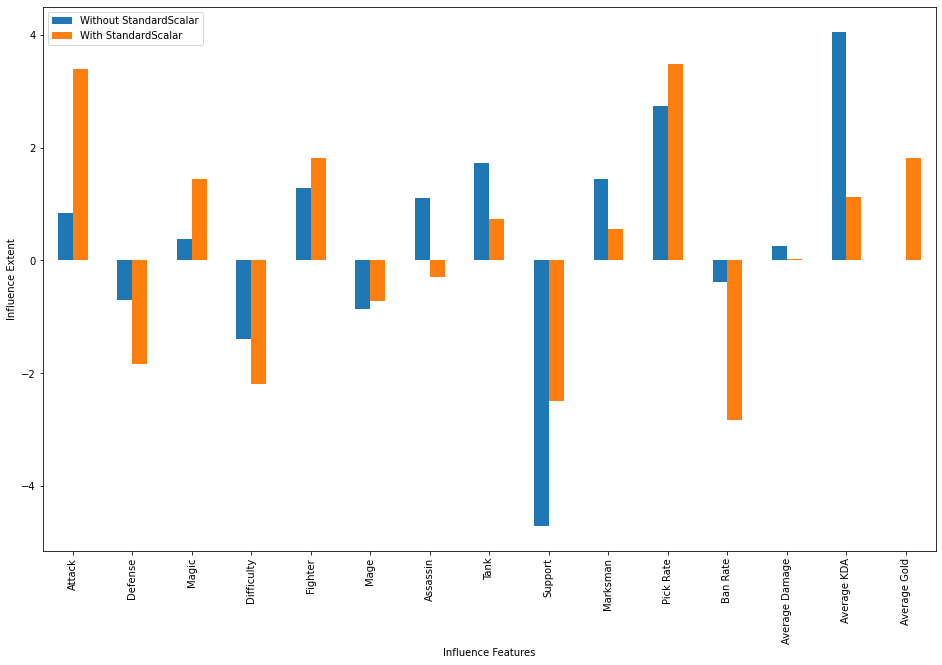

In [37]:
lr_regression_influence_table.plot(kind="bar",x="Influence Features",y=["Without StandardScalar","With StandardScalar"],figsize=(16,10))
plt.xlabel("Influence Features")
plt.ylabel("Influence Extent")

From the chart, it can be clearly concluded that:
* Without **StandardScalar**, the role **Support** have greatest destruction to **Overall Win Rate**, while the **Pick Rate** and **Average KDA** help the win rate the most.
* With the help of **StandardScalar**, the **Attack**, **Fighter**, **Pick Rate**, and **Average Gold** have the most positive impact on win rate.

Plot the **R2 score** versus **polynomial degree** by **Line Chart**

Text(0.5, 1.0, 'R2 Value for Training and Testing with Train Test Split but without StandardScalar')

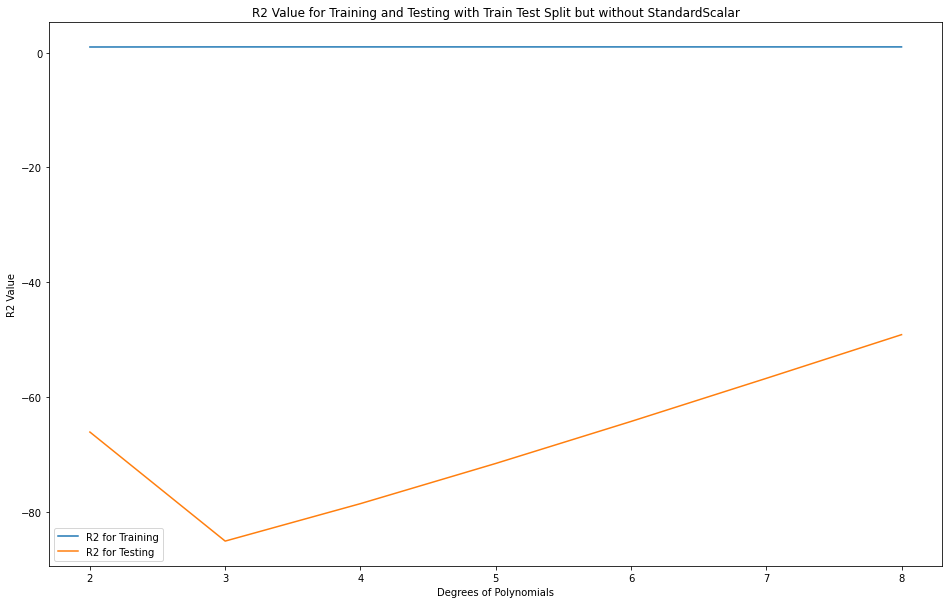

In [38]:
r2_table_for_poly_without_standardscalar.plot(kind="line",x="Degrees of Polynomial",y=["R2 for Training","R2 for Testing"],figsize=(16,10))
plt.xlabel("Degrees of Polynomials")
plt.ylabel("R2 Value")
plt.title("R2 Value for Training and Testing with Train Test Split but without StandardScalar")

Text(0.5, 1.0, 'R2 Value for Training and Testing with Lasso, StandardScalar, and Train Test Split')

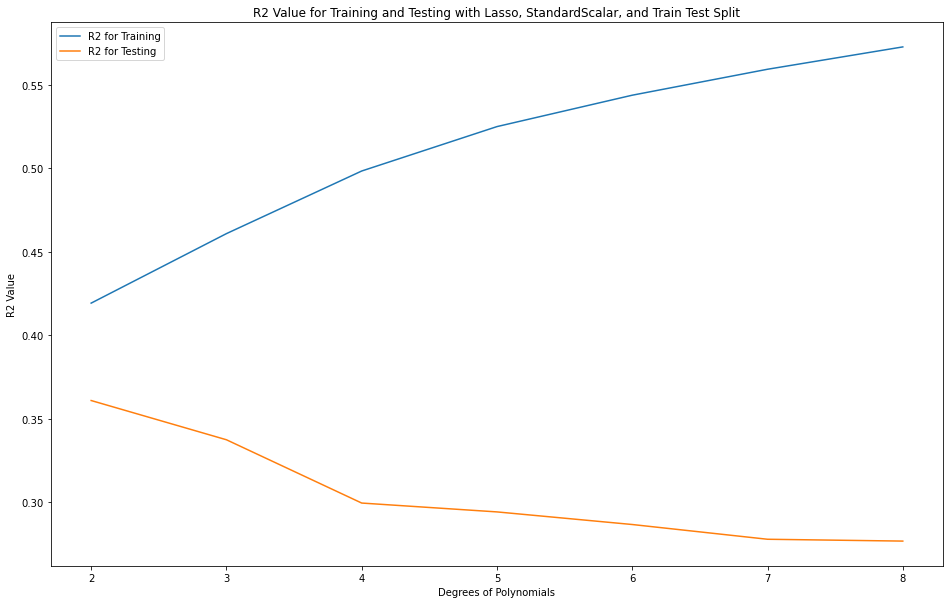

In [39]:
r2_table_with_las_and_train_test.plot(kind="line",x="Degrees of Polynomial",y=["R2 for Training","R2 for Testing"],figsize=(16,10))
plt.xlabel("Degrees of Polynomials")
plt.ylabel("R2 Value")
plt.title("R2 Value for Training and Testing with Lasso, StandardScalar, and Train Test Split")

### Conclusions of this project  <a id="6"></a>

Here are some key conclusions of this project:

* **Lasso** is very important for reducing the error of the testing set.
* Polynomial regressions are not feasible without the help of **Lasso** and **StandardScalar**.
* **Fighter** can bring great help in win rate, while **Support** is harmful to win rate. Thus, if you want to increase your win rate please choose **Fighter**.
* The **Pick Rate** and **Average KDA** of champions are also important for helping win rate.

## Thanks for reading